# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


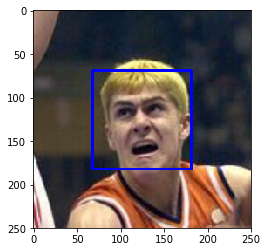

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[245])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

98% of the first 100 images in human_files have a detected human face.

17% of the first 100 images in dog_files have a detected human face

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_count = human_dog_count = 0

for image in human_files_short:
    if face_detector(image) > 0:
        human_count += 1
        
for image in dog_files_short:
    if face_detector(image) > 0:
        human_dog_count += 1
        
print("{}% of human files contain human faces.".format(human_count))
print("{}% of dog files contain human faces.".format(human_dog_count))

98% of human files contain human faces.
17% of dog files contain human faces.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.



---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 102711054.78it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    
    
    ### My Solution:
    
    #Loading the image using the given path, and cnoverting to RGB (the original format of the input img is Jpg)
    pil_img = Image.open(img_path).convert("RGB") 
    
    # Creating a transformer that does the following steps:
    # 1. resizing the image to a 224*224 image, as vgg16 accepts 224*224 input
    # 2. conoverting the PIL Image object to torch Tensor
    # 3. Normalizing the image (this would improve the model prediction accuracy)
    img_transform = transforms.Compose([transforms.RandomResizedCrop(size=224) ,
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    #transforming the pillow image
    img = img_transform(pil_img)
    
    if use_cuda:
        img = img.cuda()
    
    #adding the batch dimension:
    img.unsqueeze_(0)
    
    #calling the vgg16 model on img
    output = VGG16(img)
    
    #getting the predicted class
    _ , pred = torch.max(output, 1)
    
    return pred.squeeze().item() # predicted class index

In [6]:
VGG16_predict(dog_files[108])

206

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred_class = VGG16_predict(img_path)
    dog_flag = pred_class >= 151 and pred_class <= 268
    return dog_flag

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

94 images out of 100 dog images are correctly classified as dogs (94%)

0 image out of 100 human images are classfied as docs (0%)


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

d_count = 0
h_count = 0 

for dog_file in dog_files_short:
    if dog_detector(dog_file):
        d_count +=1
        
for human_file in human_files_short:
    if dog_detector(human_file):
        h_count+=1
        

print("vgg16 detected dogs in {}% of images in dog_files_short.".format(d_count))
print("vgg16 detected dogs in {}% of images in human_files_short.".format(h_count))



vgg16 detected dogs in 94% of images in dog_files_short.
vgg16 detected dogs in 0% of images in human_files_short.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import numpy as np
from glob import glob
import os

import torch
from torchvision import datasets
import torchvision.transforms as transforms

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
use_cuda = torch.cuda.is_available()

In [20]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


## I've defined 3 different transformers for training, validation, and testing.
## I've included some data augmentations for the training transform.

train_transform = transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

valid_transform = transforms.Compose([
        transforms.Resize(size=(256,256)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

test_transform = transforms.Compose([
        transforms.Resize(size=(256,256)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

## Defining data directories for training, validation and test sets.

main_dir = '/data/dog_images/'
train_dir = os.path.join(main_dir, 'train/')
valid_dir = os.path.join(main_dir, 'valid/')
test_dir = os.path.join(main_dir, 'test/')


## Crerating torch datasets for each of the training, validation and test data

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)


loaders_scratch = {}
loaders_scratch['train'] = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle=True)
loaders_scratch['valid'] = torch.utils.data.DataLoader(valid_data, batch_size = 32, shuffle=True)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_data, batch_size = 32, shuffle=True)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

* I used RandomResizdCrop transformer, which first randomly crops and scales the image, and then resizes it based on a given dimension (here 256). This transfoormer is also proven to be an effective augmentation technique in some of the well-known CNN models (because of random cropping/scaling). I chose the input size of 256*256 (length and width)  for the input tensor, due to the following intuitions: (1) The input tensor might be large enough to give me enough room to use mumerous conv and maxpooling layers if needed (because the tensor size would dicrease lengthwise/widthwise after each maxpooling layer). (2) As there are many similarities between some of the different dog breeds, distniguishing between different dog breeds might need attention to the input images in great details. My assumption was that by specifying a rather large input tensors to the model, the model would more likely be able to capture detailed minescule features needed to distiniguish between dog breeds, specially within the first conv layers. (3) One main reason to choose this dimension is indeed "no reason". An inherent part of modeling is to experiment with different parameters and just see which one works better!


* Yes I did. I used a RandomResizedCrop transformer, which randomly crop and scale the input image, a RandomHorizontalFlip transformer, which randomly flips input images horizontaly, and a RandomRotatoinTransformer, which randomly rotate input images by 10 degrees.



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [21]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,32,3, padding=1)
        self.conv2 = nn.Conv2d(32,64,3, padding =1)
        self.conv3 = nn.Conv2d(64, 128, 3 , padding=1)
   
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(32*32*128, 512)
        self.fc2 = nn.Linear(512,133)
        
        self.dropout = nn.Dropout(0.4)
        
        self.bn2d1 = nn.BatchNorm2d(32)
        self.bn2d2 = nn.BatchNorm2d(64)
        self.bn2d3 = nn.BatchNorm2d(128)
        self.bn1d1 = nn.BatchNorm1d(32*32*128)
        self.bn1d2 = nn.BatchNorm1d(512)
        
        
    def forward(self, x):
        ## Define forward behavior
        #Conv layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn2d1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2d2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.bn2d3(x)
        
        #Fully connected layers
        x = x.view(-1, 32*32*128)
        x = self.bn1d1(x)
        x = self.dropout(x)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.bn1d2(x)
        x = self.fc2(x)
        
        return x


In [22]:
# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

It was quiet a long journey (~30 GPU hours) to get to an architecure that was capable of giving me the requested test accuracy!

Here are the key challenges/items I had to work on to obtain the working architecture defined above:

* __Feature Maps' Depths (# of Channels) in Convolutional Layers__: One important lesson I learned during this exercise is that the depth of the feature map (# of channels) for each convolutional layer of the network palys an important role in the network's performance. I first started by using 3 conv layers to transform the 3 input channels to 16, 32, and 64 respectively (3 -> 16 -> 32 -> 64). Using this initial design, The network learned for a few epochs only, and then it got stuck to a more-or-less same training/validationi loss for the rest of the epochs (no learning). I then tried more Convolutionial layers with the hope of enabling the network to learn better. As multiple experiments, I tried 4 conv layers: (3 -> 16 -> 32 -> 64 -> 128), and then 5 conv layers: (3 -> 16 -> 32 -> 64 -> 128 -> 256), however, none of these experiments made notable improvements in my model's learning behavior (i.e. loss not improving after a few epochs). I then decided to investigatet some of the well-known CNN architectures, such as VGG and Alexnet, to gain some insights; and realized that using more filters (therefore generating more channels) in the first Conv layers of the network can help. As an inituitive justificatoin, we have to make sure that the model picks as many features as needed from the input layer and also the first couple of Conv layers, before loosing some data by following maxpooling layers. Using this insight, I started with using 2 conv layers: (3 -> 32 -> 64), and I noticed that my network performance is dramatically improved and can learn much furthuer than before. While I wasn't able to get an accuracy of better than 2-3% using the last design, I was able to push the accuracy to 8% using this new design. 


* __Batch Normalization Layers__: One specific challenge I had in this exercise was that the rate of convergence for training/validation loss values was so slow. For instance, the model had to be trained for about ~100 epochs to reach the validation loss of ~4.60 from the initial validatiion loss of 4.80. It was not feasable for me to let the model run for more epochs due to frustration and also my GPU time limitation. Furthermore, increasing the value of the learning rate did not help much with the convergence rate; on the other hand, using higher values for learning rate caused more fluctations in validation loss values. Carring out somewhat rigorous research, I concluded that using batch_normalization layer between conv layers and also between FC layers might help. Adding these batch_normalization layers made the convergence rage dramatically, and somewhat unbelievably, faster. After adding these layers, it took only less than 10 epochs to get what previosly took ~100 epochs! I am amazed by the simple -yet so effectie- idea of batch normalization. It's required to normalize data for many of the classic ML models (regression, SVM, kmeans etc.) for obvious reasons. We can also see each layer of a deep neural network as an independent linear regression model that receives features as input and provide outputs for an activation node. Then why not normalizing the input data for each of these layers, or at least some of them, to improve the the network performance?


* __Reduce Overfitting__: I was facing an overfitting issue after a certain number of epochs. Validation loss would reach to ~4.2 from an initial value of ~4.9, however it would stay around the same value from that point forward; whereas the training loss would keep decreasing. I decided to increase the dropout layer p value to 0.4 from the initial value of 0.25. That resolved the overfitting issue to some extend, and gave the model enough room to get to the test accuracy of higher than 10%.

### (IMPLEMENTATION)  Loss Function and Optimizer

In [23]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)

### (IMPLEMENTATION) Model Training and Validation Reusable Function

In [24]:
def train(n_epochs, epoch_offset ,loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1+epoch_offset, n_epochs+1+epoch_offset):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1/(batch_idx + 1))*(loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1/(batch_idx + 1))*(loss.data - valid_loss))

            
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


### (IMPLEMENTATION) Test Reusable Function

In [25]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

### Model_Scrath Training

#### Epoch 1 to 25 for model_scratch using lr = 0.05

In [26]:
# train the model
model_scratch = train(25,0,loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch_1_to_25.pt')


Epoch: 1 	Training Loss: 4.710759 	Validation Loss: 4.512437
Epoch: 2 	Training Loss: 4.501626 	Validation Loss: 4.410013
Epoch: 3 	Training Loss: 4.378447 	Validation Loss: 4.322291
Epoch: 4 	Training Loss: 4.295938 	Validation Loss: 4.208549
Epoch: 5 	Training Loss: 4.240904 	Validation Loss: 4.258677
Epoch: 6 	Training Loss: 4.180020 	Validation Loss: 4.109050
Epoch: 7 	Training Loss: 4.121280 	Validation Loss: 4.117652
Epoch: 8 	Training Loss: 4.087688 	Validation Loss: 4.019499
Epoch: 9 	Training Loss: 4.008237 	Validation Loss: 3.956347
Epoch: 10 	Training Loss: 3.982715 	Validation Loss: 3.964363
Epoch: 11 	Training Loss: 3.943903 	Validation Loss: 4.061065
Epoch: 12 	Training Loss: 3.894730 	Validation Loss: 4.190106
Epoch: 13 	Training Loss: 3.841597 	Validation Loss: 4.012241
Epoch: 14 	Training Loss: 3.808491 	Validation Loss: 3.881464
Epoch: 15 	Training Loss: 3.778869 	Validation Loss: 3.803807
Epoch: 16 	Training Loss: 3.753916 	Validation Loss: 3.788201
Epoch: 17 	Traini

In [27]:
model_scratch.load_state_dict(torch.load('model_scratch_1_to_25.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.716061


Test Accuracy: 14% (121/836)


The model had a natural and expected learning curve until epoch 20. There is clearly an issue from epoch 20 forward.
Although the test accuracy is good enough for the purpose of this project, however, I'm going to continue the training for another 15 epochs with a lower learning rate, to see if this odd behavior happening after epoch 20 can be fixed.

#### Epoch 25 to 40 for model_scratch using lr = 0.01

In [28]:
model_scratch.load_state_dict(torch.load('model_scratch_1_to_25.pt'))

optimizer_scratch_25_to_40 = optim.SGD(model_scratch.parameters(), lr = 0.01)

model_scratch = train(15, 25 ,loaders_scratch, model_scratch, optimizer_scratch_25_to_40, 
                      criterion_scratch, use_cuda, 'model_scratch_25_to_40.pt')

Epoch: 26 	Training Loss: 3.601789 	Validation Loss: 3.668193
Epoch: 27 	Training Loss: 3.564140 	Validation Loss: 3.635716
Epoch: 28 	Training Loss: 3.567230 	Validation Loss: 3.647209
Epoch: 29 	Training Loss: 3.531170 	Validation Loss: 3.669818
Epoch: 30 	Training Loss: 3.517712 	Validation Loss: 3.584929
Epoch: 31 	Training Loss: 3.491954 	Validation Loss: 3.709897
Epoch: 32 	Training Loss: 3.495598 	Validation Loss: 3.612935
Epoch: 33 	Training Loss: 3.490562 	Validation Loss: 3.606755
Epoch: 34 	Training Loss: 3.457284 	Validation Loss: 3.585729
Epoch: 35 	Training Loss: 3.461590 	Validation Loss: 3.532753
Epoch: 36 	Training Loss: 3.453866 	Validation Loss: 3.553313
Epoch: 37 	Training Loss: 3.431777 	Validation Loss: 3.555160
Epoch: 38 	Training Loss: 3.421165 	Validation Loss: 3.549709
Epoch: 39 	Training Loss: 3.444009 	Validation Loss: 3.608743
Epoch: 40 	Training Loss: 3.398565 	Validation Loss: 3.536445


In [29]:
model_scratch.load_state_dict(torch.load('model_scratch_25_to_40.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.501230


Test Accuracy: 16% (142/836)


<font color='red'> __Final Test Accuracy for model_scratch: 16 %__ </font> 

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [5]:
## TODO: Specify data loaders

import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

main_dir = '/data/dog_images/'
train_dir = os.path.join(main_dir, 'train/')
valid_dir = os.path.join(main_dir, 'valid/')
test_dir = os.path.join(main_dir, 'test/')

train_data = datasets.ImageFolder(train_dir, transform=transform)
valid_data = datasets.ImageFolder(valid_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

loaders_transfer = {}
loaders_transfer['train'] = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle=True)
loaders_transfer['valid'] = torch.utils.data.DataLoader(valid_data, batch_size = 32, shuffle=True)
loaders_transfer['test'] = torch.utils.data.DataLoader(test_data, batch_size = 32, shuffle=True)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [6]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.vgg16(pretrained=True)


for param in model_transfer.features.parameters():
    param.requires_grad = False

n_input = model_transfer.classifier[6].in_features

last_layer = nn.Linear(n_input, 133)

model_transfer.classifier[6] = last_layer

use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

In [7]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Not too many steps here. I chose VGG16 as the reference model for transfer-learning. VGG16 is a deep network which has already proven to work for many of the complicated image categories, including some of the dog breeds. Here are the steps:

* Freezing the weights in feature layers, i.e. all convolutional layers
* Removing the original output layer of VGG16 (1000 categories) and replacing it with a new output layer containing 133 nodes, each node representing one of the available 133 dog breeds

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [7]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr = 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [21]:
# train the model

n_epochs = 20

model_transfer = train(n_epochs, 0 ,loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.546780 	Validation Loss: 1.315936
Epoch: 2 	Training Loss: 1.373322 	Validation Loss: 1.141813
Epoch: 3 	Training Loss: 1.208628 	Validation Loss: 1.067184
Epoch: 4 	Training Loss: 1.108394 	Validation Loss: 1.015817
Epoch: 5 	Training Loss: 1.001745 	Validation Loss: 1.001301
Epoch: 6 	Training Loss: 0.985818 	Validation Loss: 1.028997
Epoch: 7 	Training Loss: 0.943062 	Validation Loss: 0.952136
Epoch: 8 	Training Loss: 0.886062 	Validation Loss: 0.900533
Epoch: 9 	Training Loss: 0.858942 	Validation Loss: 0.939020
Epoch: 10 	Training Loss: 0.833629 	Validation Loss: 1.013955
Epoch: 11 	Training Loss: 0.855102 	Validation Loss: 1.017949
Epoch: 12 	Training Loss: 0.807063 	Validation Loss: 0.956523
Epoch: 13 	Training Loss: 0.797577 	Validation Loss: 0.998526
Epoch: 14 	Training Loss: 0.781309 	Validation Loss: 0.949925
Epoch: 15 	Training Loss: 0.789369 	Validation Loss: 0.966522
Epoch: 16 	Training Loss: 0.740360 	Validation Loss: 0.948711
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [22]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.978364


Test Accuracy: 74% (619/836)


Great! The test accuracy is enough for the purpose of this project. However, I would like to run for more epoches using a lower learning rate. I can see that the validation loss fluctuates for the last few epochs in the last run, suggesting that there might still be an opportunity to make the model learn more if I let it train for more epochs using a lower learning rate:

In [24]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

optimizer_transfer_2 = optim.SGD(model_transfer.classifier.parameters(), lr= 0.002)

model_transfer = train(n_epochs, 20 ,loaders_transfer, model_transfer, optimizer_transfer_2,\
                       criterion_transfer, use_cuda, 'model_transfer_2.pt')


Epoch: 21 	Training Loss: 0.686445 	Validation Loss: 0.975596
Epoch: 22 	Training Loss: 0.656276 	Validation Loss: 0.829129
Epoch: 23 	Training Loss: 0.642610 	Validation Loss: 0.927602
Epoch: 24 	Training Loss: 0.638115 	Validation Loss: 0.920078
Epoch: 25 	Training Loss: 0.619282 	Validation Loss: 0.913121
Epoch: 26 	Training Loss: 0.642498 	Validation Loss: 0.782922
Epoch: 27 	Training Loss: 0.634361 	Validation Loss: 0.926841
Epoch: 28 	Training Loss: 0.628216 	Validation Loss: 0.852201
Epoch: 29 	Training Loss: 0.616911 	Validation Loss: 0.886931
Epoch: 30 	Training Loss: 0.622948 	Validation Loss: 0.912321
Epoch: 31 	Training Loss: 0.610490 	Validation Loss: 0.900228
Epoch: 32 	Training Loss: 0.621863 	Validation Loss: 0.938450
Epoch: 33 	Training Loss: 0.623054 	Validation Loss: 0.811426
Epoch: 34 	Training Loss: 0.603310 	Validation Loss: 0.843584
Epoch: 35 	Training Loss: 0.608431 	Validation Loss: 0.854655
Epoch: 36 	Training Loss: 0.597007 	Validation Loss: 0.794074
Epoch: 3

In [25]:
model_transfer.load_state_dict(torch.load('model_transfer_2.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.854212


Test Accuracy: 76% (640/836)


<font color='red'> __Final Test Accuracy for model_transfer: 76%__ </font> 

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [8]:
test_dir = os.path.join('/data/dog_images/', 'test/')

test_data = datasets.ImageFolder(train_dir, \
                transform= transforms.Compose([transforms.Resize(size=(224,224)),
                                               transforms.ToTensor(),
                                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]))

data_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)

In [9]:
#Getting the list of dog breed names
breeds = [x[4:] for x in data_loader.dataset.classes]

In [10]:
len(breeds)

133

In [11]:
breeds[:10]

['Affenpinscher',
 'Afghan_hound',
 'Airedale_terrier',
 'Akita',
 'Alaskan_malamute',
 'American_eskimo_dog',
 'American_foxhound',
 'American_staffordshire_terrier',
 'American_water_spaniel',
 'Anatolian_shepherd_dog']

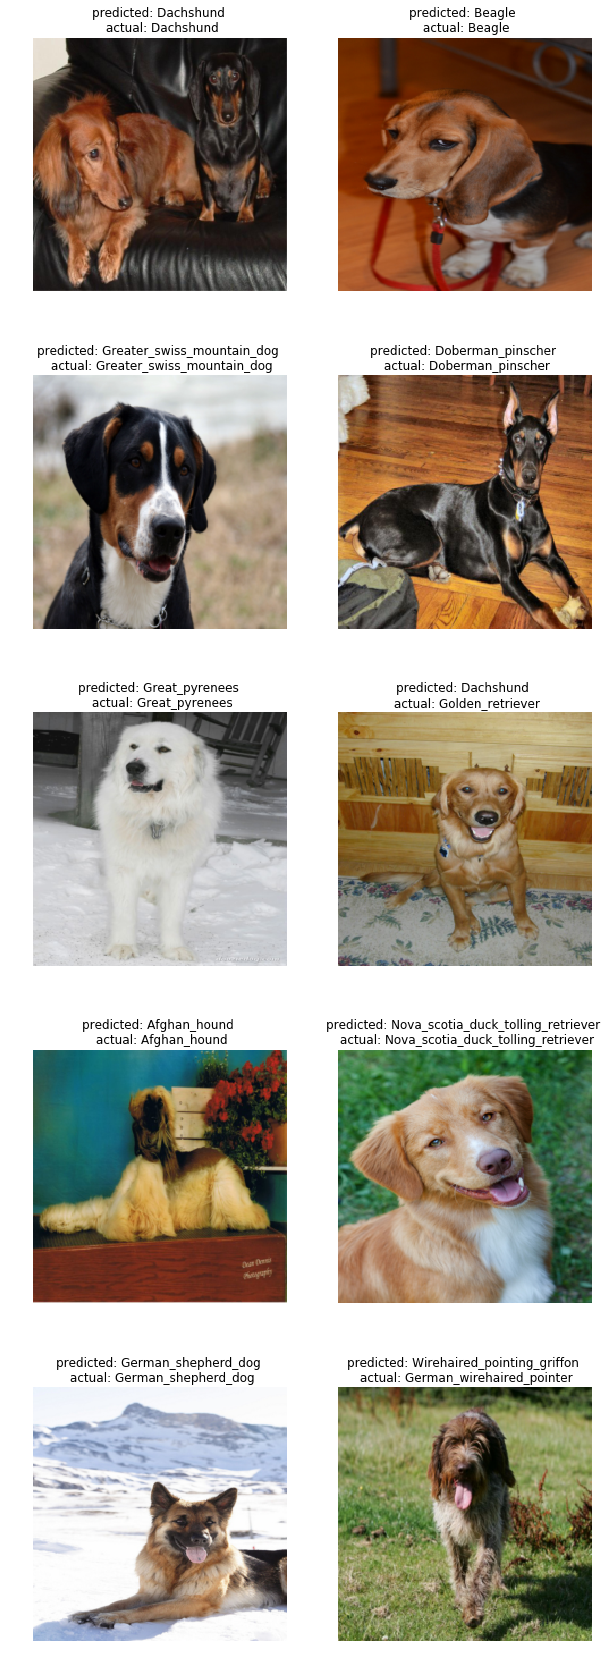

In [30]:
########## Observation Deck  ###########

# Observing the model output on a randomly selected batch of dog images from the test set.

import matplotlib.pyplot as plt
%matplotlib inline

model_transfer.load_state_dict(torch.load("model_transfer_2.pt", map_location=lambda storage, loc: storage))
model_transfer.eval()

dataiter = iter(data_loader)
images , labels = dataiter.next()


pred = model_transfer(images)
_, predClasses = torch.max(pred,1)



images = images.numpy()


fig, ax = plt.subplots(nrows=5, ncols=2, figsize= (10,30))

idx = 0

for i in range(len(ax)):
    for j in range(len(ax[i])):
        image = images[idx]/2 + 0.5
        ax[i][j].imshow(np.transpose(image,(1,2,0)))
        ax[i][j].axis('off')
        ax[i][j].set_title("predicted: {0} \n actual: {1}".format(breeds[predClasses[idx]],breeds[labels[idx]]))
        idx+=1

In [12]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def predict_breed(img_path, model_state_file_path, model, img_transform, breed_classes,use_cuda):
    pil_img = Image.open(img_path).convert("RGB") 
    
    img = img_transform(pil_img)
    
    if use_cuda:
        img = img.cuda()
    
    img.unsqueeze_(0)
    
    model.load_state_dict(torch.load(model_state_file_path, map_location=lambda storage, loc: storage))
    
    model.eval()
    
    output = model(img)
    
    _, pred = torch.max(output, 1)
    
    classIdx = pred.squeeze().item()
    
    return breed_classes[classIdx]
    

In [32]:
## Testing the predict_breed function created above

img_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])


for i in range(10):
    br = predict_breed(dog_files[i], "model_transfer_2.pt", model_transfer, img_transform, breeds, torch.cuda.is_available())
    print("predicted class for file {0} : {1}".format(dog_files[i],br))

predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06833.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06826.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06871.jpg : Bullmastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06812.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06831.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06867.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06845.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06865.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06866.jpg : Mastiff
predicted class for file /data/dog_images/train/103.Mastiff/Mastiff_06862.jpg : Mastiff


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [13]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    pil_img = Image.open(img_path).convert("RGB")
    
    img = np.array(pil_img)
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize = (5,5))
    
    img_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    if dog_detector(img_path):
        breed = predict_breed(img_path, "model_transfer_2.pt", model_transfer, \
                             img_transform, breeds, torch.cuda.is_available())
        ax.imshow(img)
        ax.set_title("A \"{}\" dog found!".format(breed))
        ax.axis('off')
        return breed
               
    elif True:#face_detector(img_path):
        breed = predict_breed(img_path, "model_transfer_2.pt", model_transfer, \
                             img_transform, breeds, torch.cuda.is_available())  
        ax.imshow(img)
        ax.set_title("A human who looks like a \"{}\" dog!".format(breed))
        ax.axis('off')
        return breed
        
    else:
        raise Exception("No dogs, no humans!")


/data/dog_images/train/103.Mastiff/Mastiff_06868.jpg


'Mastiff'

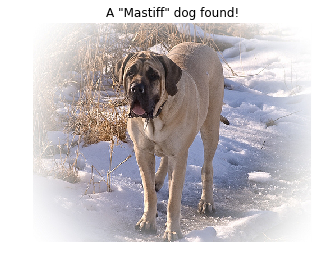

In [181]:
print(dog_files[50])
run_app(dog_files[50])

/data/dog_images/train/024.Bichon_frise/Bichon_frise_01703.jpg


'Bichon_frise'

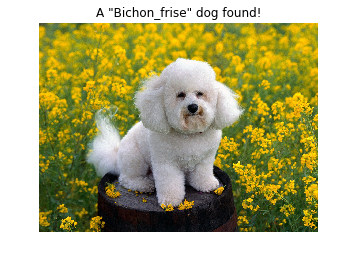

In [180]:
print(dog_files[238])
run_app(dog_files[238])

'Beagle'

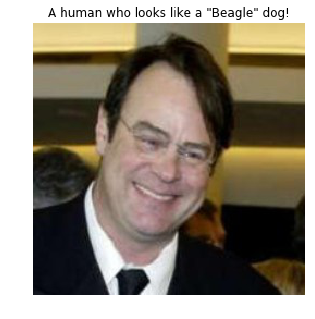

In [178]:
run_app(human_files[0])

'Pharaoh_hound'

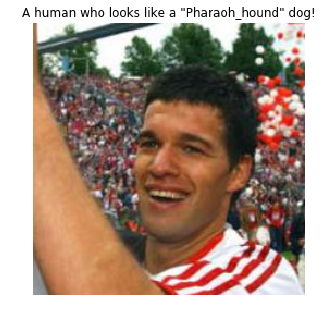

In [179]:
run_app(human_files[123])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

I tested the model on tens of different personal and Internet images (dogs, cats and human). I have included few of these experiments in this section of the project, containing prediction on images belonging to 2 dogs, 2 cats, and 2 pictures from myself. Based on my observations, I would classify my ideas for improvements in the following three categories:

* __Reduce the CNN model's dependency to color features__: The current model seems to be a bit too much dependent to the colors detected in the input images. I can relate some of the mistakes made by the model in predicting the right dog breed to the dog colors. Look at the experiment 1 below for example. Kenzo is a white Shiba Inu dog. Shiba Inu dogs are mostly orange, and not white. The model predicts Kenzo as Canaan dog, which has a similar face. You would normally find more whilte Canaan doges compared to Shiba, suggesting that color has played a role in this wrong prediction. In the 3rd experiment on Kenzo, the model predicted breed as Bull_terrier. Kenzo is by no means similar to Bull Terrier. The only similarity here is the color, as whilte is a dominating color in Bull Terrier breed. I also observed similar pattern for other dog breeds, when I tested the model on several Internet dog images. How can we make model less dependent on dogs color? One solution can be adding an augmentation preprocessing step which converts a portion of the input images to grayscale (black and white), in order to enable the model to be trained more on non-color images. 


* __Helping the CNN model to learn more from dogs' faces__: Some of the breeds are very similar to one another and even hard to distinguish by eye. I observed several cases that the model confuses a dog breed with another similar dog breed. Oftentimes, the way to distinguish between these similar breeds is to focus on mineuscule differences in their faces, such as their noses, eyes, etc. One idea here is to create a room for the CNN model to build more features from dogs faces. This can be acheived by applying a slight change in the preprocessing step. Currently, the preprocessor uses a random crop transformer. We might build a new transformer that is a bit more likely to crop the area containing the dogs faces in the picture, to make sure the model would see enough images focusing on dog faces, which can help the model to create features representing nose, eyes, and general face shapes. We can use the dog-detector functionality created at the beginning of the project to build such a transformer.


* __Helping the CNN model to learn more from dogs' fur/hair__: One important element in distinguishing between dog breeds is their fur. How can we help the model to focus more on the dogs fur? Features that can represent dogs hair/fur would have to come from the convolutional layers, as detecting the type of the fur should depends on some spatial features. Does VGG16 model have enough attention to fur? We don't know! But we can let one, two or more of the convolutional layers be trained as well, to see if that makes any improvements. To do this, we can unfreeze one or some of the Conv layers of VGG16 during the transfer learning process, with the hope of being more trained on fur-related features.

In [14]:
def myDogBreed(img_path):
    pil_img = Image.open(img_path).convert("RGB")
    
    img = np.array(pil_img)
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize = (5,5))
    
    img_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    
    breed = predict_breed(img_path, "model_transfer_2.pt", model_transfer, \
                             img_transform, breeds, torch.cuda.is_available())
    ax.imshow(img)
    ax.set_title("A \"{}\" dog found!".format(breed))
    ax.axis('off')
    return breed


### Experiment 1: Tesing The Model on Personal Dog Images
I don't have dogs myself, however, I'm using 2 of my friends dogs pictures in this experiment. 

### Kenzo
Kenzo is a pretty 18-month white Shiba Inu dog in Vancouver BC

'Canaan_dog'

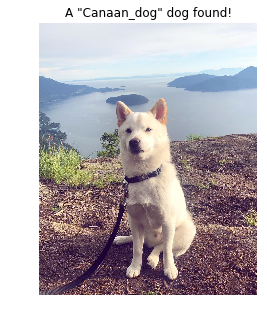

In [14]:
myDogBreed("/home/workspace/dog_project/images/personal/dog/IMG_0826.JPG")

'Canaan_dog'

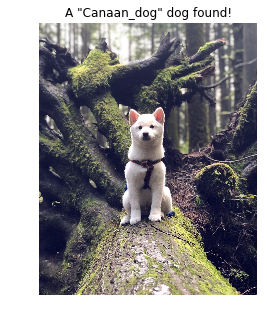

In [15]:
myDogBreed("/home/workspace/dog_project/images/personal/dog/IMG_0827.JPG")

'Bull_terrier'

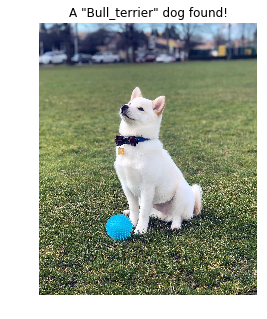

In [17]:
myDogBreed("/home/workspace/dog_project/images/personal/dog/IMG_0828.JPG")

### Lexie 
Lexie is a cute 2-month Japanese Akita dog in Toronto ON

'Akita'

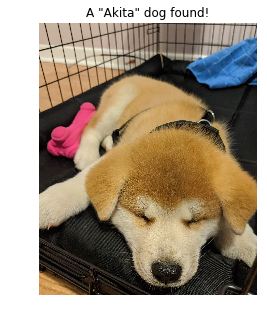

In [18]:
myDogBreed("/home/workspace/dog_project/images/personal/dog/IMG_0829.JPG")

'Akita'

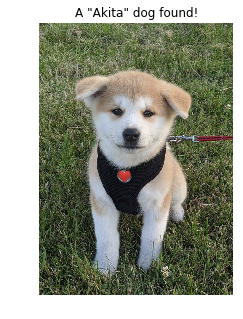

In [19]:
myDogBreed("/home/workspace/dog_project/images/personal/dog/9c5f118d-ab89-4ea2-bee0-80207b09f065.jpeg")

### Experiment 2: Tesing The Model on Personal Cat Images
As I am a cat person, I've had lots of cats since I was a child! I'm going to test the model on pictures of 2 of my cats.

### Pishi
Pishi was a playful mixed-breed kitty I had when I was a high school student. 

'Chihuahua'

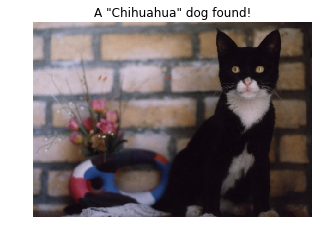

In [21]:
myDogBreed("/home/workspace/dog_project/images/personal/cat/2423_1032389255982_2946_n.JPG")

### Dennis
Dennis is a 6-month Scottish Fold cat.

'Japanese_chin'

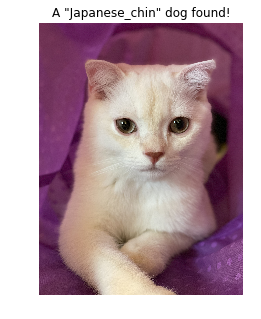

In [22]:
myDogBreed("/home/workspace/dog_project/images/personal/cat/IMG_0710.jpg")

### Experiment 3: Tesing The Model on Photos of Myself!


'Bull_terrier'

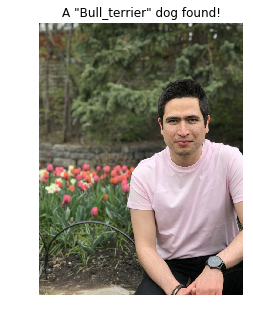

In [23]:
myDogBreed("/home/workspace/dog_project/images/personal/human/3ffd1e49-8ebc-451f-bc51-ea38d2441bd5.jpeg")

'Dogue_de_bordeaux'

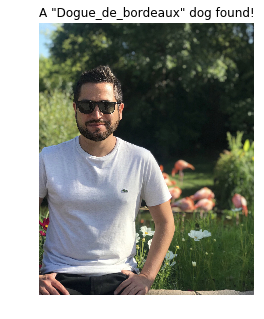

In [24]:
myDogBreed("/home/workspace/dog_project/images/personal/human/IMG_7409.JPG")